# Case Study: Bellabeat Data Analysis 
### Utilizing non-bellabeat technology data to gain insights that will inform future marketing strategies.
##### By: Elena Lawando
##### Date Written: 2024-07-08

## 1. Ask
#### Background:
Bellabeat is a health focused company founded in 2014 by Urška Sršen and Sandro Mur. Bellabeat has positioned itself as a tech-driven wellness company for women. Their smart products aim to empower women by providing insights into their own health and habits. Their main products, such as the Leaf, track user activity, sleep, and stress. Bellabeat’s cofounder Urška asks for an analysis that will help reveal more opportunities for growth. More information about the company can be found at [Bellabeat’s website](https://bellabeat.com/about-us/).

#### Business Task:
Analyze usage data from the non-Bellabeat smart device, Fitbit, to gain insights on how consumers use these products. Bellabeat can then utilize these insights to inform a marketing strategy for their products.

#### Stakeholders: 
Primary stakeholders include Urška Sršen, Sandro Mur, and their executive team. A secondary stakeholder is Bellabeat’s marketing analytics team.


## 2. Prepare
#### Datasource:
Fitbbit Fitness Tracker Data (CCO: Public Domain, made available through [Mobius](https://www.kaggle.com/datasets/arashnic/fitbit/data))

#### Data description:
This Dataset contains data about personal fitness tracking, including minute-level output for physical activity, heart rate, and sleep monitoring from thirty Fitbut users. This data was collected from a survey through Amazon Mechanical Turk between 03.12.2016 and 05.12.2016.

#### Organization:
The data is long format CSV files, separated into two files based on the date segments 03.12.2016 through 04.11.2016 and 04.12.2016 through 05.12.2016. It is long format because ID numbers are listed multiple times.

#### Data Limitations:
This data only provides user data from 30 users. The data is unique to each user based on their preferences, meaning some users did not track certain data such as weight and sleep.
#### Install and Load Relevant Packages:
The packages used for this project will include tidyverse, janitor, and skimr.

In [1]:
# load packages
library(tidyverse)
library(janitor)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### Looking through the initial data:
The first thing to do with the data is create dataframes for each of the following: daily activity, sleep, and weight. Each section will initially have one or two separate dataframes based on the date segments 03.12.2016 through 04.11.2016 (named using _1) and 04.12.2016 through 05.12.2016 (named using _2):

##### Daily activity:


In [2]:
# create dataframe for daily activity.
daily_activity_1 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
daily_activity_2 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

#take a look at the data.
head(daily_activity_1)
head(daily_activity_2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


##### Sleep:

In [3]:
# create dataframe for sleep data.
sleep_2 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# take a look at the data
head(sleep_2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


##### Weight:

In [4]:
# create dataframe for daily activity.
weight_1 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")
weight_2 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

#take a look at the data.
head(weight_1)
head(weight_2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,4/5/2016 11:59:59 PM,53.3,117.5064,22,22.97,True,1.459901e+12
2,1927972279,4/10/2016 6:33:26 PM,129.6,285.7191,NA,46.17,False,1.460313e+12
3,2347167796,4/3/2016 11:59:59 PM,63.4,139.7731,10,24.77,True,1.459728e+12
4,2873212765,4/6/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.459987e+12
5,2873212765,4/7/2016 11:59:59 PM,57.2,126.1044,NA,21.65,True,1.460074e+12
6,2891001357,4/5/2016 11:59:59 PM,88.4,194.8886,NA,25.03,True,1.459901e+12


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


## 3. Process

#### Checking and Cleaning Data:
The two dataframes per section (daily activity, sleep, and weight) can be combined into one dataframe each. These new dataframes are named as all_daily_activity, all_sleep, and all weight.

In [5]:
# combine dataframes
all_daily_activity <- rbind(daily_activity_1, daily_activity_2)
all_sleep <- (sleep_2)
all_weight <- rbind(weight_1, weight_2)

# take a look at the data
head(all_daily_activity)
head(all_sleep)
head(all_weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,4/5/2016 11:59:59 PM,53.3,117.5064,22,22.97,True,1.459901e+12
2,1927972279,4/10/2016 6:33:26 PM,129.6,285.7191,NA,46.17,False,1.460313e+12
3,2347167796,4/3/2016 11:59:59 PM,63.4,139.7731,10,24.77,True,1.459728e+12
4,2873212765,4/6/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.459987e+12
5,2873212765,4/7/2016 11:59:59 PM,57.2,126.1044,NA,21.65,True,1.460074e+12
6,2891001357,4/5/2016 11:59:59 PM,88.4,194.8886,NA,25.03,True,1.459901e+12


I can clean up these new dataframes to make sure the column names are unique and consistent using the clean_names() function.

In [6]:
# clean names
all_daily_activity_clean <- clean_names(all_daily_activity)
all_sleep_clean <- clean_names(all_sleep)
all_weight_clean <- clean_names(all_weight)

# take a look at the data
head(all_daily_activity_clean)
head(all_sleep_clean)
head(all_weight_clean)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,4/5/2016 11:59:59 PM,53.3,117.5064,22,22.97,True,1.459901e+12
2,1927972279,4/10/2016 6:33:26 PM,129.6,285.7191,NA,46.17,False,1.460313e+12
3,2347167796,4/3/2016 11:59:59 PM,63.4,139.7731,10,24.77,True,1.459728e+12
4,2873212765,4/6/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.459987e+12
5,2873212765,4/7/2016 11:59:59 PM,57.2,126.1044,NA,21.65,True,1.460074e+12
6,2891001357,4/5/2016 11:59:59 PM,88.4,194.8886,NA,25.03,True,1.459901e+12


I can view the column names using the function colnames().

In [7]:
# view column names
colnames(all_daily_activity_clean)
colnames(all_sleep_clean)
colnames(all_weight_clean)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
[5] "fat"              "bmi"              "is_manual_report" "log_id"

## 4. Analyze
Now I can analyze our data to get some important statistics about this data.

#### How many unique participants are there in each dataframe?
I will use the n_distinct() function to determine how many unique participants are in each dataframe.

In [8]:
n_distinct(all_daily_activity_clean$id)
n_distinct(all_sleep_clean$id)
n_distinct(all_weight_clean$id)

[1] 35

[1] 24

[1] 13

Using the n_distinct() function I found that 35 individuals reported their daily activity, 24 reported their sleep, and 13 reported their weight.

#### How many observations are in each dataframe?
I will use the nrow() function to see how many observations are in each of the three dataframes created.

In [9]:
nrow(all_daily_activity_clean)
nrow(all_sleep_clean)
nrow(all_weight_clean)

[1] 1397

[1] 413

[1] 100

Using the nrow() function I found that there are 1397 observations reported for daily activity, 413 reported for sleep, and 100 reported for weight.

#### Summary statistics for each dataframe:

##### Daily Activity:
I can use the summary() function to get basic statistics on the columns total_steps, total_distance, and sedentary_minutes.

In [10]:
all_daily_activity_clean %>%  
  select(total_steps,
         total_distance,
         sedentary_minutes) %>%
  summary()

  total_steps    total_distance   sedentary_minutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   
 1st Qu.: 3146   1st Qu.: 2.170   1st Qu.: 729.0   
 Median : 6999   Median : 4.950   Median :1057.0   
 Mean   : 7281   Mean   : 5.219   Mean   : 992.5   
 3rd Qu.:10544   3rd Qu.: 7.500   3rd Qu.:1244.0   
 Max.   :36019   Max.   :28.030   Max.   :1440.0   

##### Sleep:
I can use the summary() function to get basic statistics on the columns total_sleep_records, total_minutes_asleep, and total_time_in_bed.

In [11]:
all_sleep_clean %>%  
  select(total_sleep_records,
         total_minutes_asleep,
         total_time_in_bed) %>%
  summary()

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.000       Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.000       1st Qu.:361.0        1st Qu.:403.0    
 Median :1.000       Median :433.0        Median :463.0    
 Mean   :1.119       Mean   :419.5        Mean   :458.6    
 3rd Qu.:1.000       3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.000       Max.   :796.0        Max.   :961.0    

##### Weight:
I can use the summary() function to get basic statistics on the columns weight_pounds, bmi, and is_manual_report.

In [12]:
all_weight_clean %>%  
  select(weight_pounds,
         bmi,
         is_manual_report) %>%
  summary()

 weight_pounds        bmi        is_manual_report  
 Min.   :116.0   Min.   :21.45   Length:100        
 1st Qu.:135.6   1st Qu.:24.00   Class :character  
 Median :137.8   Median :24.39   Mode  :character  
 Mean   :159.8   Mean   :25.37                     
 3rd Qu.:188.1   3rd Qu.:25.59                     
 Max.   :294.3   Max.   :47.54                     

## 5. Share
At this point I can create some data visualizations using the ggplot2 functions for scatter plots and bar charts.

#### Daily Activity:
I will make plots to explore the relationships between different data in the daily activity dataframe.

##### Exploring the relationships between daily activity and days of the week: 
I will create two bar charts; a bar chart for sedentary minutes vs the day of the week and a bar chart for total steps vs the day of the week.

To do this, I first need to use the weekdays function to insert a new column into the dataframe that will tell us what the day of the week is. 

In [13]:
all_daily_activity_clean$weekday <- weekdays(as.Date(all_daily_activity_clean$activity_date, format = "%m/%d/%Y"))

I can use the colnames function to ensure the weekday column is in the dataframe, and then use the head function to preview the dataframe.

In [14]:
colnames(all_daily_activity_clean)
head(all_daily_activity_clean)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "weekday"

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819,Friday
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154,Saturday
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944,Sunday
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932,Monday
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886,Tuesday
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820,Wednesday


Now, I can create the bar chart Sedentary Minutes vs. Day of the Week.

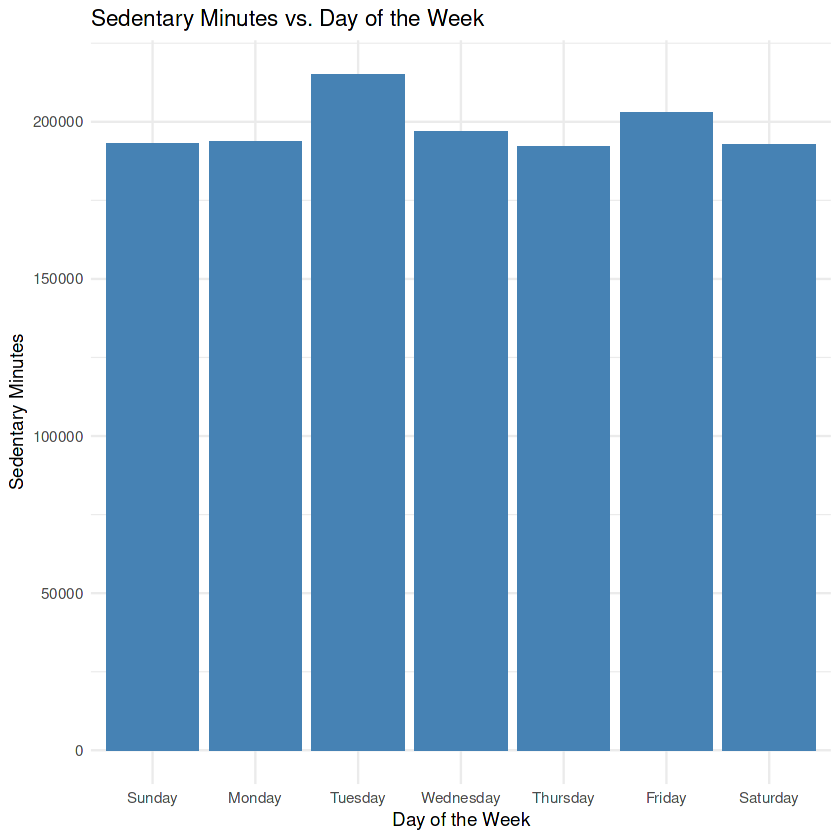

In [15]:
#to make sure the days of the week will be in order
all_daily_activity_clean$weekday <- factor(all_daily_activity_clean$weekday, 
                                           levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#create a bar chart of sedentary minutes vs. weekday
ggplot(all_daily_activity_clean, aes(x=weekday, y=sedentary_minutes)) + geom_bar(stat="identity", fill = "steelblue") +
  labs(title ="Sedentary Minutes vs. Day of the Week",
       x = "Day of the Week",
       y = "Sedentary Minutes") +
  theme_minimal()

I can also create the bar chart for the total steps vs. the day of the week.

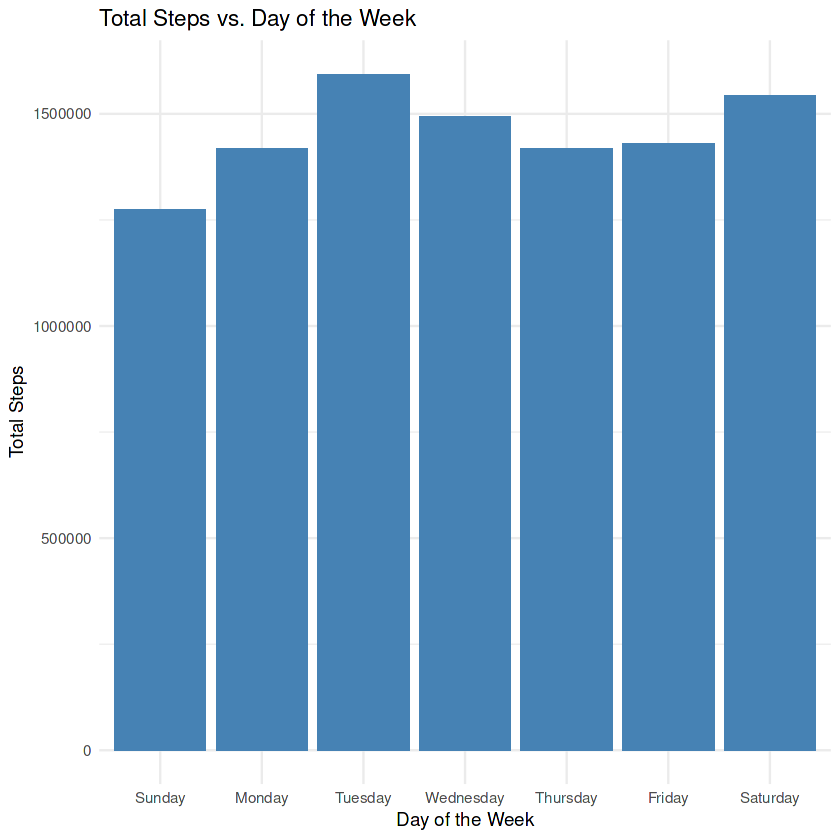

In [16]:
ggplot(all_daily_activity_clean, aes(x=weekday, y=total_steps)) + geom_bar(stat="identity", fill="steelblue") +
  labs(title = "Total Steps vs. Day of the Week",
       x = "Day of the Week",
       y= "Total Steps") +
  theme_minimal()

##### Exploring the relationship between steps taken in a day and sedentary minutes:

In order to explore the relationship between steps taken in a day and sedentary minutes, I will create a plot using the cleaned daily activity sheet.

`geom_smooth()` using formula = 'y ~ x'


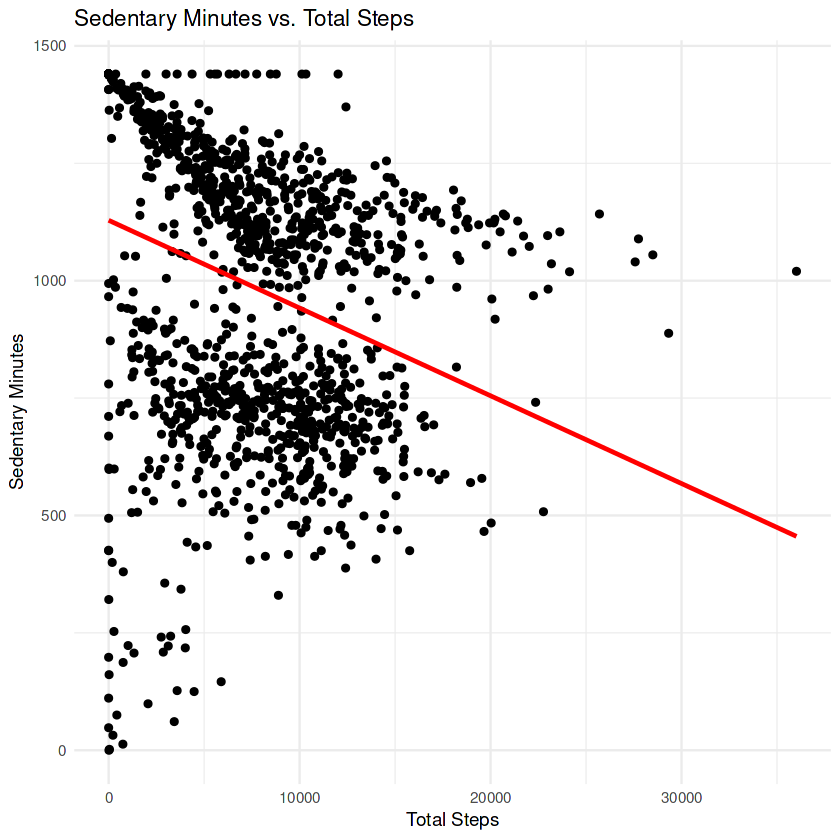

In [17]:
#plotting sedentary minutes vs total steps
ggplot(data=all_daily_activity_clean, aes(x=total_steps, y=sedentary_minutes)) + geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Sedentary Minutes vs. Total Steps",
       x = "Total Steps",
       y= "Sedentary Minutes") +
  theme_minimal()

#### Sleep:
I will make plots to explore the relationships between different data in the sleep dataframe.
##### Exploring the relationship between the total minutes asleep and the day of the week:
I will create a bar chart of the minutes asleep vs. the day of the week.
However, before I can create this bar chart I need to use the weekdays function to insert a new column in the sleep dataframe that lists the day of the week.

In [18]:
#insert weekdays
all_sleep_clean$weekday <- weekdays(as.Date(all_sleep_clean$sleep_day, format = "%m/%d/%Y"))

I can use the colnames function to ensure the weekday column is in the dataframe, and then use the head function to preview the dataframe.

In [19]:
colnames(all_sleep_clean)
head(all_sleep_clean)

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"    "weekday"

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday
,<dbl>,<chr>,<int>,<int>,<int>,<chr>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,Wednesday
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,Friday
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,Saturday
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,Sunday
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,Tuesday


Now, I can create the bar graph for total minutes asleep vs day of the week.

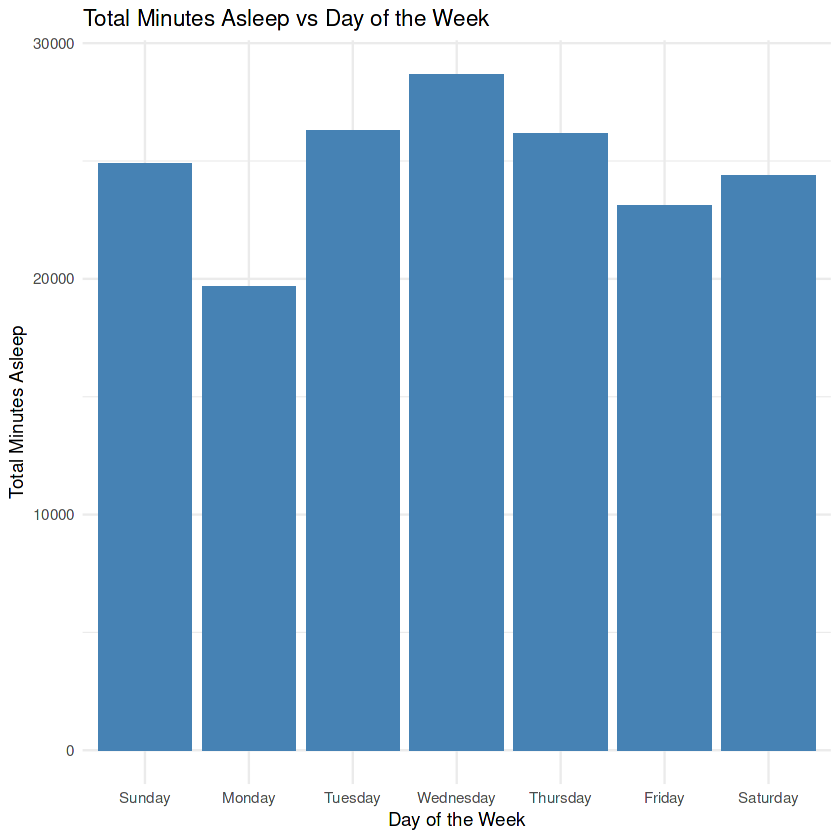

In [20]:
#to make sure the days of the week are in order
all_sleep_clean$weekday <- factor(all_sleep_clean$weekday, 
                                           levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#create a bar graph for total_minutes_asleep vs. weekday
ggplot(data=all_sleep_clean, aes(x=weekday, y=total_minutes_asleep)) + geom_bar(stat="identity", fill= "steelblue") +
  labs(title = "Total Minutes Asleep vs Day of the Week",
       x = "Day of the Week",
       y = "Total Minutes Asleep") +
  theme_minimal()

I can take this one step further and add a second variable which will allow me to compare the total time in bed and the time spent sleeping based on the day of the week.
To do this I need to create a new dataframe to have workable data with two variables as total_minutes_asleep and total_time_in_bed.

In [21]:
#grouped bar chart for time in bed and total time asleep
#first reshape data to be long
all_sleep_clean_long <- all_sleep_clean %>%
  pivot_longer(cols = c(total_minutes_asleep, total_time_in_bed),
               names_to = "variable", 
               values_to = "value")

I can check this data using the head function.

In [22]:
head(all_sleep_clean_long)

id,sleep_day,total_sleep_records,weekday,variable,value
<dbl>,<chr>,<int>,<fct>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,1,Tuesday,total_minutes_asleep,327
1503960366,4/12/2016 12:00:00 AM,1,Tuesday,total_time_in_bed,346
1503960366,4/13/2016 12:00:00 AM,2,Wednesday,total_minutes_asleep,384
1503960366,4/13/2016 12:00:00 AM,2,Wednesday,total_time_in_bed,407
1503960366,4/15/2016 12:00:00 AM,1,Friday,total_minutes_asleep,412
1503960366,4/15/2016 12:00:00 AM,1,Friday,total_time_in_bed,442


Now I can plot both variables onto one grouped bar chart. 

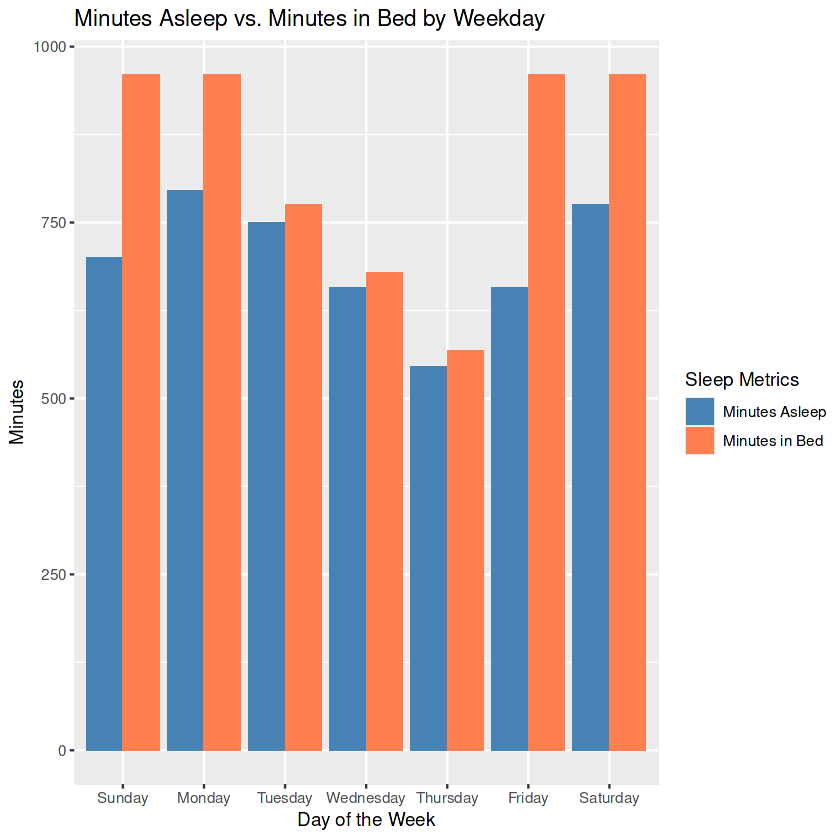

In [23]:
#to make sure the days of the week are in order 
all_sleep_clean_long$weekday <- factor(all_sleep_clean_long$weekday, 
                                           levels = c("Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#create grouped bar chart
ggplot(all_sleep_clean_long, aes(fill=variable, y=value, x=weekday)) + 
    geom_bar(position="dodge", stat="identity") +
  scale_fill_manual(
    values = c("total_minutes_asleep" = "steelblue", "total_time_in_bed" = "coral"),
    name = "Sleep Metrics", 
    labels = c("total_minutes_asleep" = "Minutes Asleep", "total_time_in_bed" = "Minutes in Bed")  
  ) +
  labs(title = "Minutes Asleep vs. Minutes in Bed by Weekday",
       x = "Day of the Week",
       y = "Minutes")

##### Exploring the relationship between sleep and activity level:
I will plot the averages for active minutes vs. minutes asleep, and incorporate trend lines based on very active minutes, fairly active minutes, lightly active minutes, and sedentary minutes. 

First, I will combine the relevant sleep and activity data based on the id column.

In [24]:
combined_data <- merge(all_sleep_clean, all_daily_activity_clean, by="id")

I will check the data using head() and n_distinct().

In [25]:
head(combined_data)
n_distinct(combined_data$id)

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday.x,activity_date,total_steps,total_distance,tracker_distance,⋯,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday.y
,<dbl>,<chr>,<int>,<int>,<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/24/2016,10039,6.41,6.41,⋯,2.92,0.21,3.28,0,39,5,238,709,1788,Sunday
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/27/2016,18134,12.21,12.21,⋯,6.40,0.41,5.41,0,78,11,243,1108,2159,Wednesday
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/30/2016,14673,9.25,9.25,⋯,3.56,1.42,4.27,0,52,34,217,712,1947,Saturday
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/29/2016,11181,7.15,7.15,⋯,1.06,0.50,5.58,0,16,12,243,815,1837,Friday
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/12/2016,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/23/2016,14371,9.04,9.04,⋯,2.81,0.87,5.36,0,41,21,262,732,1949,Saturday


[1] 24

Next, I need to add a new column to the combined_data dataframe named active minutes.

In [26]:
combined_data_new <- combined_data %>% 
  mutate(active_minutes= rowSums(combined_data[, c("lightly_active_minutes", "very_active_minutes", "fairly_active_minutes", "sedentary_minutes")]))
colnames(combined_data_new)
head(combined_data_new)

[1] "id"                         "sleep_day"                 
 [3] "total_sleep_records"        "total_minutes_asleep"      
 [5] "total_time_in_bed"          "weekday.x"                 
 [7] "activity_date"              "total_steps"               
 [9] "total_distance"             "tracker_distance"          
[11] "logged_activities_distance" "very_active_distance"      
[13] "moderately_active_distance" "light_active_distance"     
[15] "sedentary_active_distance"  "very_active_minutes"       
[17] "fairly_active_minutes"      "lightly_active_minutes"    
[19] "sedentary_minutes"          "calories"                  
[21] "weekday.y"                  "active_minutes"

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday.x,activity_date,total_steps,total_distance,tracker_distance,⋯,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday.y,active_minutes
,<dbl>,<chr>,<int>,<int>,<int>,<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/24/2016,10039,6.41,6.41,⋯,0.21,3.28,0,39,5,238,709,1788,Sunday,991
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/27/2016,18134,12.21,12.21,⋯,0.41,5.41,0,78,11,243,1108,2159,Wednesday,1440
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/30/2016,14673,9.25,9.25,⋯,1.42,4.27,0,52,34,217,712,1947,Saturday,1015
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/29/2016,11181,7.15,7.15,⋯,0.50,5.58,0,16,12,243,815,1837,Friday,1086
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/12/2016,13162,8.50,8.50,⋯,0.55,6.06,0,25,13,328,728,1985,Tuesday,1094
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,4/23/2016,14371,9.04,9.04,⋯,0.87,5.36,0,41,21,262,732,1949,Saturday,1056


Finally, I can plot active minutes vs. minutes asleep with trend lines for each activity type and include a legend.

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


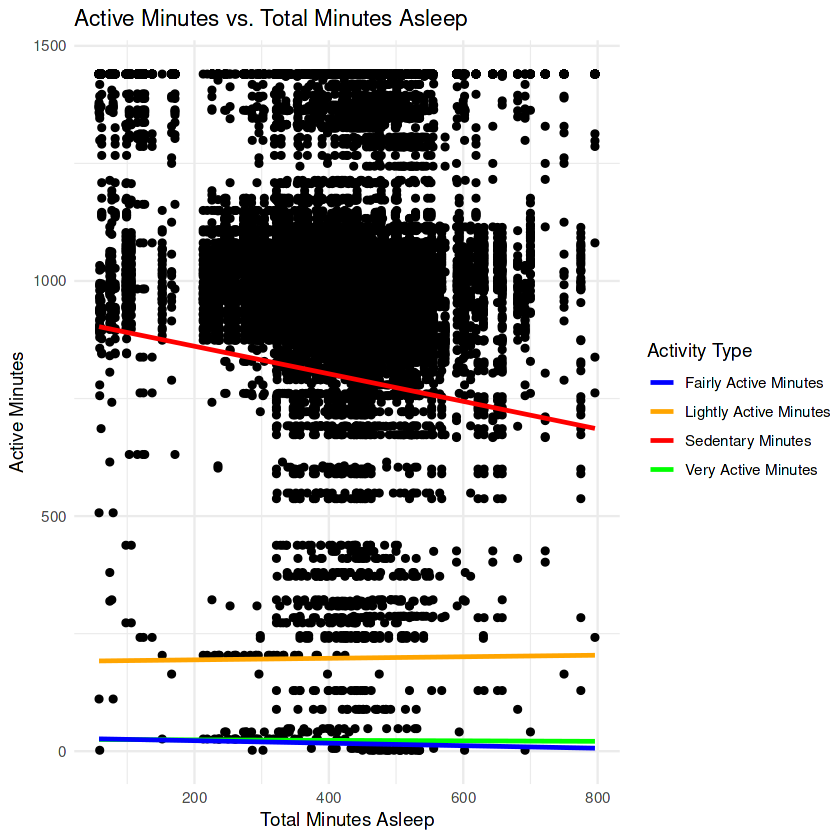

In [27]:
#Do people who sleep more walk more or less?
#Create a scatter plot
ggplot(data = combined_data_new) +
  # Scatter plot for active_minutes vs. total_minutes_asleep
  geom_point(mapping = aes(x = total_minutes_asleep, y = active_minutes)) +
  
  # Trendlines with legend
  geom_smooth(mapping = aes(x = total_minutes_asleep, y = very_active_minutes, color = "Very Active Minutes"), 
              method = "lm", se = FALSE) +
  
  geom_smooth(mapping = aes(x = total_minutes_asleep, y = fairly_active_minutes, color = "Fairly Active Minutes"), 
              method = "lm", se = FALSE) +
  
  geom_smooth(mapping = aes(x = total_minutes_asleep, y = lightly_active_minutes, color = "Lightly Active Minutes"), 
              method = "lm", se = FALSE) +
  
  geom_smooth(mapping = aes(x = total_minutes_asleep, y = sedentary_minutes, color = "Sedentary Minutes"), 
              method = "lm", se = FALSE) +
  
  # Manually set colors for the trendlines
  scale_color_manual(values = c("Very Active Minutes" = "green", 
                                "Fairly Active Minutes" = "blue", 
                                "Lightly Active Minutes" = "orange", 
                                "Sedentary Minutes" = "red")) +
  
  labs(title = "Active Minutes vs. Total Minutes Asleep",
       x = "Total Minutes Asleep",
       y = "Active Minutes",
       color = "Activity Type") + 
  theme_minimal()

#### Weight:
##### Exploring the relationship between manual or automatic weight entry:
In order to explore the relationship between manual or automatic input of weights recorded I will create a bar chart with the amounts of each type of input.

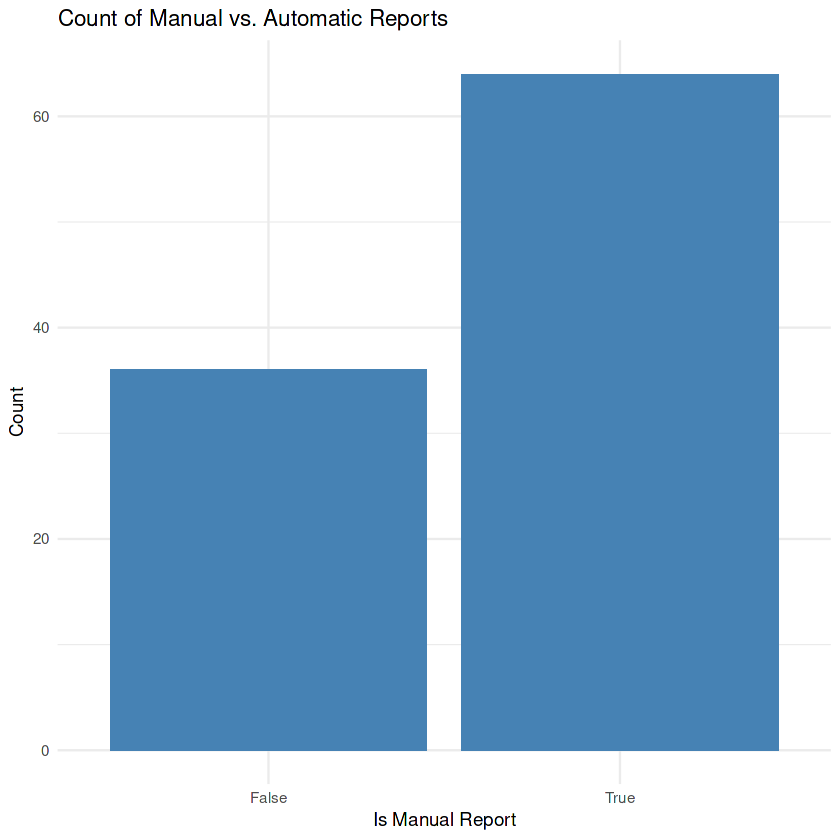

In [28]:
#manual vs automatic weight entry
ggplot(all_weight_clean, aes(x=is_manual_report)) + geom_bar(stat="count", fill = "steelblue") +
  labs(title = "Count of Manual vs. Automatic Reports",
       x = "Is Manual Report",
       y = "Count") +
  theme_minimal()

## 6. Act

#### Daily Activity:
In regards to the data on daily activity, this analysis reveals a correlation between step counts and sedentary behavior. There is a pronounced trend of increased sedentary activity on Sundays, suggesting that individuals engage in less physical activities on this weekday. This finding is potentially contributing to overall wellness challenges. To address this Bellabeat should consider tracking this decreased activity. They can then offer tailored activity schedules to accommodate certain days where there will be lowered activity. The data also revealed that individuals with higher sedentary activity minutes have lower total steps. The team should implement ways to encourage more steps/higher forms of activity.

#### Sleep:
In regards to the data on sleep, the analysis reveals that individuals who had higher sedentary activity got less sleep, conversely people with more active minutes got more sleep. Additionally, the data revealed that individuals spent a significant amount of time in bed without actually sleeping. This may indicate that individuals are not necessarily achieving quality rest; to encourage this the company should develop reminders to encourage winding down at the end of the day. In the morning they should encourage more activity. In addition to this analysis, more research should be conducted to determine what most people do in bed when not sleeping. This additional research can allow the team to develop an app that can target these specific needs.


#### Weight:
In regards to the data on weight, the majority of individuals had to report their weight manually. Bellabeat should look into a streamlined method of automatic weight recording.
By offering an integrated method for automatic weight tracking, Bellabeat can enhance user experience. In turn, this change will encourage more consistent monitoring of weight, which is crucial for maintaining health and fitness goals.

#### Overall: 
The data that was analyzed is a record of individuals fitness data tracking habits, which ultimately reveals several areas where data tracking can be improved. Bellabeat can address the increased sedentary behavior seen on weekends, encourage better sleep habits, and simplify the weight tracking process through a comprehensive app for their devices. These changes are all actionable insights that can lead to enhanced user satisfaction and wellbeing. Bellabeat should move forward with these strategic improvements to better support users’ health and wellness. This data can further visualized in an interactive dashboard story created [here](https://public.tableau.com/views/BellabeatDataAnalysis_17247976522460/Story1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link). 
